In [ ]:
import pandas as pd
!pip install spmf
from spmf import Spmf
import matplotlib.pyplot as plt
import numpy as np
import ast
import re

#Q1

1

In [ ]:
csv_file_path = "/content/sample_data/Question1.csv"
df = pd.read_csv(csv_file_path)
print(df.head())

   Sid  Eid  eventA  eventB  eventC
0    1    1   87.32   58.20   32.93
1    1    2   37.80   68.16   59.57
2    1    3   70.23   -3.69   34.04
3    1    4   60.76   33.86   35.85
4    1    5   85.62   60.74   65.74


Equal Frequency, bins = 3

In [ ]:
df_ef_3 = df.copy()
num_bins = 3
df_ef_3["eventA"] = pd.qcut(df_ef_3["eventA"], q=num_bins, labels = range(1,4))
df_ef_3["eventB"] = pd.qcut(df_ef_3["eventB"], q=num_bins, labels = range(4,7))
df_ef_3["eventC"] = pd.qcut(df_ef_3["eventC"], q=num_bins, labels= range(7,10))
df_ef_3

,Sid,Eid,eventA,eventB,eventC
0,1,1,3,5,7
1,1,2,1,6,8
2,1,3,3,4,7
3,1,4,2,4,7
4,1,5,3,5,9
...,...,...,...,...,...
495,100,1,2,5,9
496,100,2,2,6,8
497,100,3,2,6,9
498,100,4,1,4,9


Equal Frequency, bins = 5

In [ ]:
df_ef_5 = df.copy()
num_bins = 5
df_ef_5["eventA"] = pd.qcut(df_ef_5["eventA"], q=num_bins, labels = range(1,6))
df_ef_5["eventB"] = pd.qcut(df_ef_5["eventB"], q=num_bins, labels = range(6,11))
df_ef_5["eventC"] = pd.qcut(df_ef_5["eventC"], q=num_bins, labels= range(11,16))
df_ef_5

,Sid,Eid,eventA,eventB,eventC
0,1,1,5,8,12
1,1,2,2,9,14
2,1,3,4,6,12
3,1,4,4,7,12
4,1,5,5,9,14
...,...,...,...,...,...
495,100,1,3,7,14
496,100,2,3,10,12
497,100,3,2,10,15
498,100,4,2,6,15


Equal width, bins = 3

In [ ]:
df_ew_3 = df.copy()
num_bins = 3
df_ew_3["eventA"] = pd.cut(df_ew_3["eventA"], bins=num_bins, labels = range(1,4))
df_ew_3["eventB"] = pd.cut(df_ew_3["eventB"], bins=num_bins, labels = range(4,7))
df_ew_3["eventC"] = pd.cut(df_ew_3["eventC"], bins=num_bins, labels= range(7,10))
df_ew_3

,Sid,Eid,eventA,eventB,eventC
0,1,1,3,5,8
1,1,2,2,5,8
2,1,3,2,4,8
3,1,4,2,5,8
4,1,5,3,5,8
...,...,...,...,...,...
495,100,1,2,5,8
496,100,2,2,6,8
497,100,3,2,6,9
498,100,4,2,4,8


Equal width, bins = 5

In [ ]:
df_ew_5 = df.copy()
num_bins = 5
df_ew_5["eventA"] = pd.cut(df_ew_5["eventA"], bins=num_bins, labels = range(1,6))
df_ew_5["eventB"] = pd.cut(df_ew_5["eventB"], bins=num_bins, labels = range(6,11))
df_ew_5["eventC"] = pd.cut(df_ew_5["eventC"], bins=num_bins, labels= range(11,16))
df_ew_5

,Sid,Eid,eventA,eventB,eventC
0,1,1,4,8,12
1,1,2,2,8,13
2,1,3,3,6,12
3,1,4,3,7,12
4,1,5,4,8,13
...,...,...,...,...,...
495,100,1,3,7,13
496,100,2,3,9,13
497,100,3,3,9,14
498,100,4,2,6,14


2

In [ ]:
def score(df,min_support,algorithm):
    transactions = []
    for sid in range(1, 101):
        sid_lst = []
        df_sid = df[df['Sid'] == sid]
        for eid in range(1, len(df_sid) + 1):
            temp_df2 = df_sid[df_sid['Eid'] == eid]
            events_lst = [
                int(temp_df2['eventA'].values[0]),
                int(temp_df2['eventB'].values[0]),
                int(temp_df2['eventC'].values[0])
            ]
            sid_lst.append(events_lst)
        transactions.append(sid_lst)
    spmf = Spmf(algorithm, input_direct=transactions, arguments=[min_support], spmf_bin_location_dir='/content/sample_data/')
    spmf.run()
    return spmf.to_pandas_dataframe()



>/content/sample_data/spmf.jar
=============  PREFIXSPAN 0.99-2016 - STATISTICS =============
 Total time ~ 190 ms
 Frequent sequences count : 1024
 Max memory (mb) : 10.703125
 minsup = 20 sequences.
 Pattern count : 1024


>/content/sample_data/spmf.jar
=============  PREFIXSPAN 0.99-2016 - STATISTICS =============
 Total time ~ 185 ms
 Frequent sequences count : 174
 Max memory (mb) : 10.703125
 minsup = 30 sequences.
 Pattern count : 174


>/content/sample_data/spmf.jar
=============  PREFIXSPAN 0.99-2016 - STATISTICS =============
 Total time ~ 69 ms
 Frequent sequences count : 113
 Max memory (mb) : 10.703125
 minsup = 40 sequences.
 Pattern count : 113


>/content/sample_data/spmf.jar
=============  PREFIXSPAN 0.99-2016 - STATISTICS =============
 Total time ~ 60 ms
 Frequent sequences count : 87
 Max memory (mb) : 10.305137634277344
 minsup = 50 sequences.
 Pattern count : 87


>/content/sample_data/spmf.jar
=============  PREFIXSPAN 0.99-2016 - STATISTICS =============
 Total 

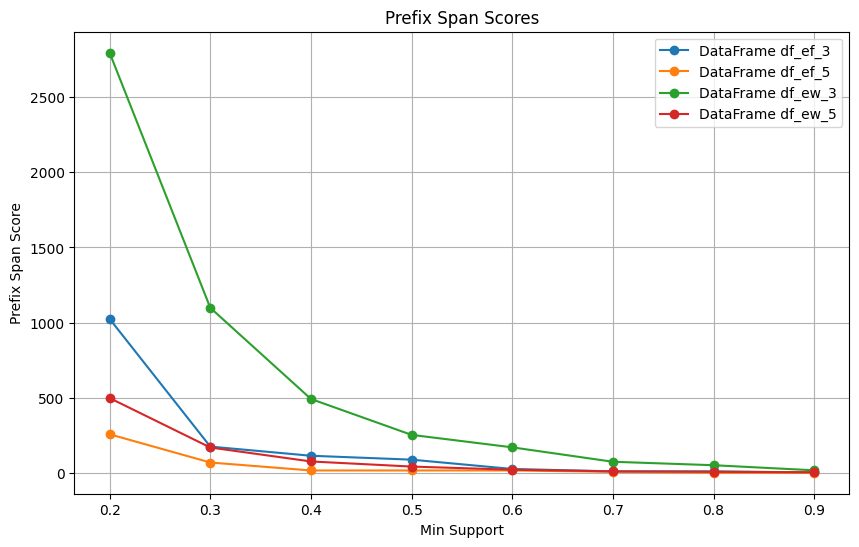

In [ ]:
df_list = [df_ef_3, df_ef_5, df_ew_3, df_ew_5]
df_names = ["df_ef_3", "df_ef_5", "df_ew_3", "df_ew_5"]
min_support_lst = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]


scores = {f'DataFrame {df_names[i]}': [] for i in range(len(df_names))}


for i, df_new in enumerate(df_list):
    for min_support in min_support_lst:
        result_df = score(df_new, min_support,"PrefixSpan")
        scores[f'DataFrame {df_names[i]}'].append(len(result_df))


plt.figure(figsize=(10, 6))
plt.title("Prefix Span Scores")
plt.xlabel('Min Support')
plt.ylabel('Prefix Span Score')

for df_name, score_list in scores.items():
    plt.plot(min_support_lst, score_list, marker='o', label=df_name)

plt.legend()
plt.grid(True)
plt.xticks(min_support_lst)
plt.show()

d

In [ ]:
print(score(df_ew_3,0.8,'VMSP'))

>/content/sample_data/spmf.jar
=============  VMSP v0.97 - STATISTICS =============
 Total time ~ 56 ms
 Frequent sequences count : 35
 Max memory (mb) : 8.50521087646484435
minsup 80
Intersection count 159 


      pattern  sup
0   [8, 8, 8]   82
1    [5 8, 8]   82
2   [8, 8, 5]   82
3    [8, 5 8]   87
4   [8, 5, 8]   81
5   [5, 8, 8]   80
6   [5, 8, 5]   80
7   [8, 8, 2]   82
8    [8, 2 8]   87
9   [8, 2, 8]   81
10  [2, 8, 8]   82
11   [5, 5 8]   81
12   [5 8, 5]   80
13   [2 8, 8]   86
14   [2 5, 8]   87
15   [5 8, 2]   83
16  [2, 5, 8]   81
17   [5, 2 8]   86
18  [5, 2, 8]   81
19  [2, 8, 5]   81
20   [2 8, 5]   86
21   [2, 5 8]   83
22  [8, 2, 5]   80
23  [8, 5, 2]   80
24   [8, 2 5]   83
25    [2 5 8]   84
26   [2, 2 8]   90
27   [2 8, 2]   85
28  [8, 2, 2]   81
29  [2, 2, 8]   81
30   [5, 2 5]   80
31   [2 5, 2]   85
32   [2, 2 5]   83
33  [5, 2, 2]   81
34  [2, 2, 2]   84


e

In [ ]:
print(score(df_ew_3,0.8,'ClaSP'))

>/content/sample_data/spmf.jar
=============  Algorithm - STATISTICS =============
 Total time ~ 45 ms
 Frequent closed sequences count : 50
 Join count : 159
 Max memory (mb):10.105155944824219

      pattern  sup
0      [2, 8]   97
1     [2 5 8]   84
2    [5, 2 5]   80
3   [5, 8, 8]   80
4   [8, 2, 2]   81
5   [8, 8, 5]   82
6      [5, 5]   90
7   [8, 5, 2]   80
8   [2, 8, 8]   82
9   [2, 2, 8]   81
10   [2 8, 2]   85
11   [2 8, 5]   86
12      [5 8]   95
13  [2, 8, 5]   81
14     [8, 8]   98
15  [8, 8, 8]   82
16   [8, 2 5]   83
17   [2, 2 5]   83
18  [8, 8, 2]   82
19   [2 5, 2]   85
20     [5, 2]   95
21   [8, 2 8]   87
22     [8, 5]   97
23  [5, 2, 2]   81
24  [8, 2, 5]   80
25   [8, 5 8]   87
26      [2 5]   94
27     [5, 8]   96
28  [2, 5, 8]   81
29   [5 8, 2]   83
30   [5, 2 8]   86
31  [2, 2, 2]   84
32   [5, 5 8]   81
33     [2, 2]   98
34   [2, 5 8]   83
35   [2 5, 8]   87
36      [2 8]   98
37   [5 8, 8]   82
38   [5 8, 5]   80
39   [2 8, 8]   86
40  [8, 2, 8]   81
41   [

#Q2

In [ ]:
csv_file_path_2 = "/content/sample_data/Question2.csv"
df_2 = pd.read_csv(csv_file_path_2)
print(df_2.head())

   SID  Team              Events  \
0    0  1609  [8, 8, 8, 8, 8, 8]   
1    1  1631              [8, 1]   
2    2  1609        [1, 8, 8, 8]   
3    3  1609              [1, 8]   
4    4  1631     [8, 8, 8, 8, 8]   

                                        Event Names                Sub Events  \
0  ['Pass', 'Pass', 'Pass', 'Pass', 'Pass', 'Pass']  [85, 83, 82, 82, 85, 85]   
1                                  ['Pass', 'Duel']                  [82, 10]   
2                  ['Duel', 'Pass', 'Pass', 'Pass']          [10, 82, 82, 83]   
3                                  ['Duel', 'Pass']                  [10, 83]   
4          ['Pass', 'Pass', 'Pass', 'Pass', 'Pass']      [82, 82, 85, 85, 83]   

                                     Sub Event Names  
0  ['Simple pass', 'High pass', 'Head pass', 'Hea...  
1                          ['Head pass', 'Air duel']  
2  ['Air duel', 'Head pass', 'Head pass', 'High p...  
3                          ['Air duel', 'High pass']  
4  ['Head pass', 'Hea

A

In [ ]:
def score_2(df,min_support_lst,df_name,algorithm):
    lst = []

    scores = {'DataFrame '+ df_name: [] }

    for min_support in min_support_lst:
        spmf = Spmf(algorithm, input_direct=df, arguments=[min_support], spmf_bin_location_dir='/content/sample_data/')
        spmf.run()
        results = spmf.to_pandas_dataframe()
        scores['DataFrame '+ df_name].append(len(results))

    plt.figure(figsize=(10, 6))
    plt.title("Prefix Span Scores")
    plt.xlabel('Min Support')
    plt.ylabel('Prefix Span Score')


    plt.plot(min_support_lst, scores['DataFrame '+ df_name], marker='o', label=df_name)

    plt.legend()
    plt.grid(True)
    plt.xticks(min_support_lst)
    plt.show()

In [ ]:
min_support_lst = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4]

>/content/sample_data/spmf.jar
=============  PREFIXSPAN 0.99-2016 - STATISTICS =============
 Total time ~ 25 ms
 Frequent sequences count : 28
 Max memory (mb) : 8.305137634277344
 minsup = 19 sequences.
 Pattern count : 28


>/content/sample_data/spmf.jar
=============  PREFIXSPAN 0.99-2016 - STATISTICS =============
 Total time ~ 21 ms
 Frequent sequences count : 14
 Max memory (mb) : 8.105148315429688
 minsup = 38 sequences.
 Pattern count : 14


>/content/sample_data/spmf.jar
=============  PREFIXSPAN 0.99-2016 - STATISTICS =============
 Total time ~ 40 ms
 Frequent sequences count : 8
 Max memory (mb) : 7.905097961425781
 minsup = 57 sequences.
 Pattern count : 8


>/content/sample_data/spmf.jar
=============  PREFIXSPAN 0.99-2016 - STATISTICS =============
 Total time ~ 40 ms
 Frequent sequences count : 4
 Max memory (mb) : 7.905097961425781
 minsup = 76 sequences.
 Pattern count : 4


>/content/sample_data/spmf.jar
=============  PREFIXSPAN 0.99-2016 - STATISTICS ============

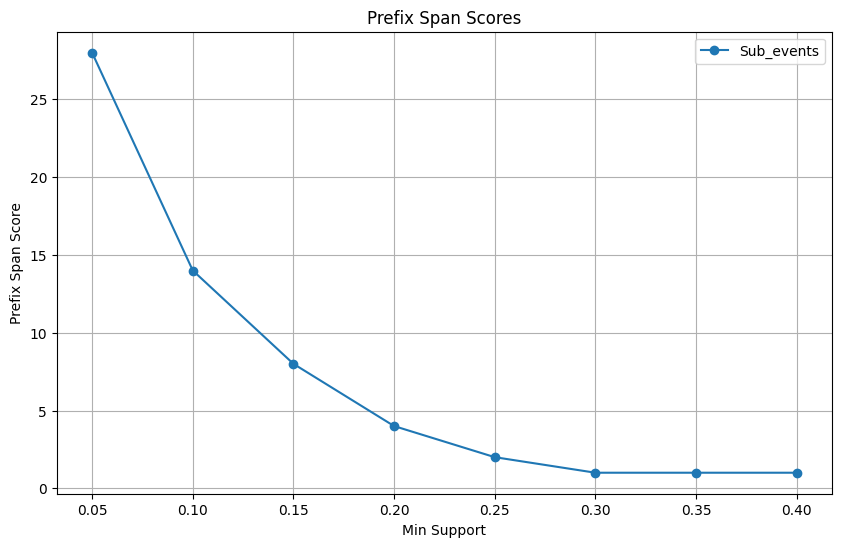

None


In [ ]:
df_sub_event = np.array(df_2["Sub Events"])
df_sub_event = df_sub_event.tolist()
df_sub_event = [[ast.literal_eval(event)] for event in df_sub_event]
print(score_2(df_sub_event,min_support_lst,'Sub_events',"PrefixSpan"))

In [ ]:
sub_events = df_2.copy()
unique_items = set()
for sublist_str in sub_events['Sub Event Names']:
    sublist = ast.literal_eval(sublist_str)

    if isinstance(sublist, list):
        unique_items.update(sublist)
    else:
        unique_items.add(sublist.strip())

print("items of sub events", len(unique_items))

items of sub events 24


c

>/content/sample_data/spmf.jar
=============  PREFIXSPAN 0.99-2016 - STATISTICS =============
 Total time ~ 29 ms
 Frequent sequences count : 33
 Max memory (mb) : 8.305137634277344
 minsup = 19 sequences.
 Pattern count : 33


>/content/sample_data/spmf.jar
=============  PREFIXSPAN 0.99-2016 - STATISTICS =============
 Total time ~ 20 ms
 Frequent sequences count : 17
 Max memory (mb) : 8.105117797851562
 minsup = 38 sequences.
 Pattern count : 17


>/content/sample_data/spmf.jar
=============  PREFIXSPAN 0.99-2016 - STATISTICS =============
 Total time ~ 17 ms
 Frequent sequences count : 9
 Max memory (mb) : 8.105117797851562
 minsup = 57 sequences.
 Pattern count : 9


>/content/sample_data/spmf.jar
=============  PREFIXSPAN 0.99-2016 - STATISTICS =============
 Total time ~ 21 ms
 Frequent sequences count : 7
 Max memory (mb) : 8.105300903320312
 minsup = 76 sequences.
 Pattern count : 7


>/content/sample_data/spmf.jar
=============  PREFIXSPAN 0.99-2016 - STATISTICS ============

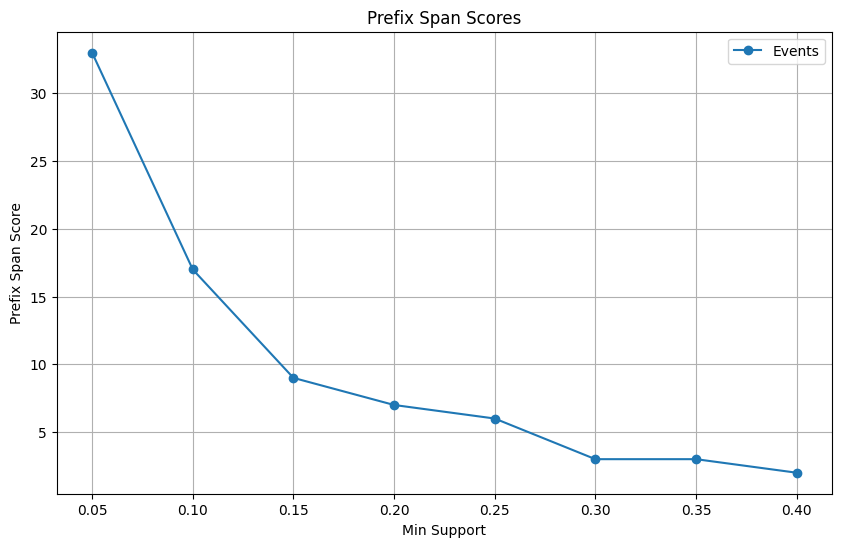

None


In [ ]:
df_event = np.array(df_2["Events"])
df_event = df_event.tolist()
df_event = [[ast.literal_eval(event)] for event in df_event]
print(score_2(df_event,min_support_lst,'Events',"PrefixSpan"))

In [ ]:
events = df_2.copy()
unique_items = set()
for sublist_str in sub_events['Event Names']:
    sublist = ast.literal_eval(sublist_str)

    if isinstance(sublist, list):
        unique_items.update(sublist)
    else:
        unique_items.add(sublist.strip())

print("items of sub events", len(unique_items))

items of sub events 9


d

In [ ]:
df_event = df_2["Events"].values.tolist()
passes_lists = [[ast.literal_eval(event)] for event in df_event if ast.literal_eval(event).count(8) >= 3]
passes_lists = [event_list[0] for event_list in passes_lists]
count_pass = len(passes_lists)
print(count_pass)
count_df_2 = len(df_2)
num = count_pass/count_df_2*100
print('Percentage of at least 3 passes in each attack', str(round(num,3))+'%')

97
Percentage of at least 3 passes in each attack 25.594%


e

In [ ]:
pattern_to_find = 36
pattern = [36,85]
pattern2 = [36,82]
df_event = df_2["Sub Events"].values.tolist()
lst = [[ast.literal_eval(event)] for event in df_event]
lst = [event_list[0] for event_list in lst]
throw_in_lists = [sublist for sublist in lst if pattern_to_find in sublist]
print("Number of throw in:",len(throw_in_lists))
lst_8 = [i for i in range(80,90)]
count_throw = 0
lst_throw_pass = []
for t in throw_in_lists:
  for i in t:
    if i in lst_8:
      lst_throw_pass.append(t)
      count_throw +=1
      break
print("Number of throw in and pass:",count_throw)
print('Percentage of at throw in and than pass attack', str(round(count_throw/len(throw_in_lists)*100,3))+'%')

Number of throw in: 47
Number of throw in and pass: 27
Percentage of at throw in and than pass attack 57.447%


f

In [ ]:
spmf = Spmf("PrefixSpan", input_direct=df_sub_event,arguments=[0.05], spmf_bin_location_dir='/content/sample_data/')
spmf.run()
df_spmf = spmf.to_pandas_dataframe()

df_spmf.sort_values(by='sup',ascending=False)

>/content/sample_data/spmf.jar
=============  PREFIXSPAN 0.99-2016 - STATISTICS =============
 Total time ~ 45 ms
 Frequent sequences count : 28
 Max memory (mb) : 8.105117797851562
 minsup = 19 sequences.
 Pattern count : 28




,pattern,sup
15,[85],184
17,[85 85],112
6,[11],85
19,[85 85 85],78
12,[50],73
4,[72],65
5,[10],58
14,[83],57
20,[85 85 85 85],54
9,[13],51


#Q3

In [ ]:
csv_file_path_3 = "/content/sample_data/Question3.csv"
df_3 = pd.read_csv(csv_file_path_3)
df_3.head()

,SID,EID,Events
0,1,1,"['20', '21', '25', '39', '46', '52', '58']"
1,1,2,"['0', '42', '52', '69']"
2,1,3,"['43', '56', '98']"
3,1,4,"['27', '40', '73']"
4,2,1,"['20', '43', '58']"


a

In [ ]:
def score3(df,min_support,algorithm):
    transactions = []
    for sid in range(1, 301):
        sid_lst = []
        df_sid = df[df['SID'] == sid]
        for eid in range(1, len(df_sid) + 1):
            temp_df2 = df_sid[df_sid['EID'] == eid]
            lst = temp_df2['Events'].values[0].strip("[]").split(',')
            int_list = [int(item.strip().strip("'")) for item in lst]
            events_lst = int_list
            sid_lst.append(events_lst)
        transactions.append(sid_lst)
    spmf = Spmf(algorithm, input_direct=transactions, arguments=[min_support], spmf_bin_location_dir='/content/sample_data/')
    spmf.run()
    spmf.parse_output()
    return spmf.to_pandas_dataframe().sort_values(by="sup",ascending=False)


In [ ]:
df_3_1 = df_3.copy()
df_20_58 = score3(df_3_1,0.3,"PrefixSpan")
filtered_lines = df_20_58[(df_20_58['pattern'].apply(lambda x: '20 58' in x)) &
                    (df_20_58['pattern'].apply(lambda x: len(x) > 1)) &
                    (df_20_58['pattern'].apply(lambda x: x[0] == '20 58'))]
filtered_lines

>/content/sample_data/spmf.jar
=============  PREFIXSPAN 0.99-2016 - STATISTICS =============
 Total time ~ 202 ms
 Frequent sequences count : 120
 Max memory (mb) : 10.703125
 minsup = 90 sequences.
 Pattern count : 120




,pattern,sup
36,"[20 58, 40]",122
37,"[20 58, 43]",113
38,"[20 58, 20]",112
40,"[20 58, 58]",103
39,"[20 58, 20 58]",102


b

In [ ]:
df_3_2 = df_3.copy()
df_3_2 = score3(df_3_2,0.3,"PrefixSpan")
df_3_2["pattern"] = [", ".join(p) for p in df_3_2["pattern"]]
df_3_2["pattern"] = [re.sub(r'[\[\],]', "", p) for p in df_3_2["pattern"]]
longest_list = max(df_3_2["pattern"], key=len)
print("The largest purchase:" ,longest_list)


>/content/sample_data/spmf.jar
=============  PREFIXSPAN 0.99-2016 - STATISTICS =============
 Total time ~ 120 ms
 Frequent sequences count : 120
 Max memory (mb) : 10.703125
 minsup = 90 sequences.
 Pattern count : 120


The largest purchase: 20 46 55 58 81 94


c

In [ ]:
df_3_3 = df_3.copy()
df_3_3_score = score3(df_3_3,0.3,"PrefixSpan")
filtered_lines_3 = df_3_3_score[(df_3_3_score['pattern'].apply(lambda x: any('39' in item for item in x)))]
filtered_lines_3


>/content/sample_data/spmf.jar
=============  PREFIXSPAN 0.99-2016 - STATISTICS =============
 Total time ~ 100 ms
 Frequent sequences count : 120
 Max memory (mb) : 10.703125
 minsup = 90 sequences.
 Pattern count : 120




,pattern,sup
59,[39],92
61,[39 46],91
60,[39 52],91
48,[21 39],90
49,[21 39 46],90
